In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
holdout= pd.read_csv("/content/raisin-holdout.csv")
raisin=pd.read_csv("/content/raisin-training.csv")

In [ ]:
raisin.info()
raisin.head()

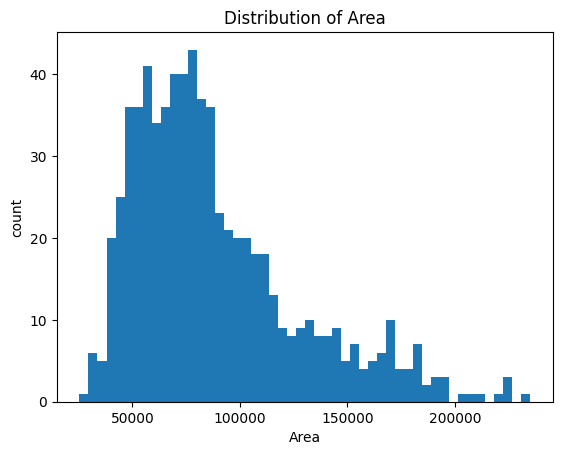

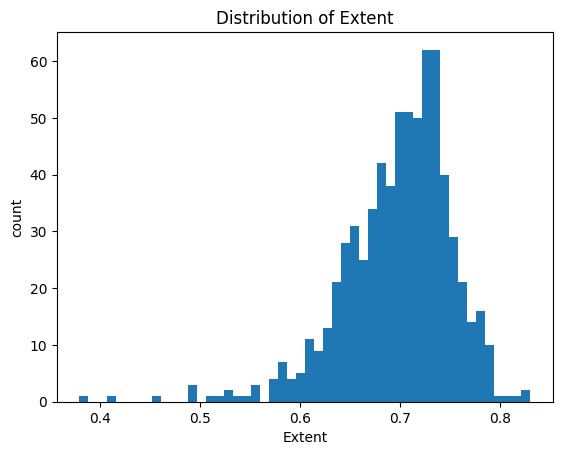

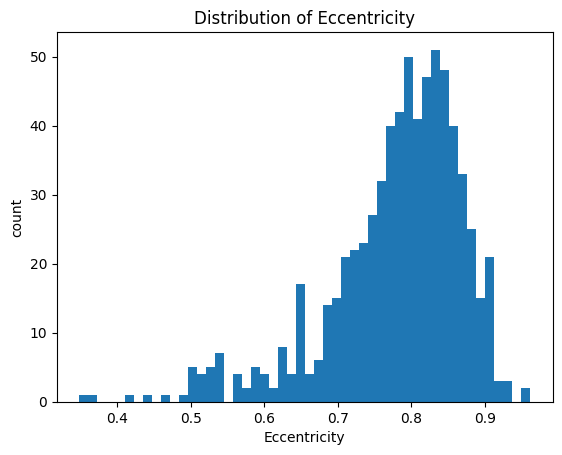

In [5]:
def hist_plot(col, bins=50):
    plt.figure()
    plt.hist(raisin[col].dropna(), bins=bins)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


hist_plot("Area")
hist_plot("Extent")
hist_plot("Eccentricity")

In [ ]:
raisin["Class"] = raisin["Class"].map({"Kecimen": 0, "Besni": 1})

X= raisin.drop(columns=["Class"])
y=raisin["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, y_pred_lr))

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

In [4]:
final_model = rf
final_model.fit(X, y)


holdout_preds = final_model.predict(holdout)

predictions = pd.DataFrame({
    "Class": np.where(holdout_preds == 0, "Kecimen", "Besni")
})

predictions.head()


predictions.to_csv("raisin_predictions.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             698 non-null    int64  
 1   MajorAxisLength  698 non-null    float64
 2   MinorAxisLength  698 non-null    float64
 3   Eccentricity     698 non-null    float64
 4   ConvexArea       698 non-null    int64  
 5   Extent           698 non-null    float64
 6   Perimeter        698 non-null    float64
 7   Class            698 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 43.8 KB
Logistic Accuracy: 0.8785714285714286
RF Accuracy: 0.8857142857142857
[[66  6]
 [10 58]]
